<a href="https://colab.research.google.com/github/Gideono29/Machine-Learning-Projects/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Task 1

In [ ]:
#Reading the CSV file into pandas dataframe
data_set = pd.read_csv('https://raw.githubusercontent.com/MazenMTULab/ML_COURSE_RESOURCES/refs/heads/main/Dataset/Assignment_Dataset/covid_tests.csv')

<ipython-input-34-dc3b05f0a4b1>:2: DtypeWarning: Columns (5,25,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv('https://raw.githubusercontent.com/MazenMTULab/ML_COURSE_RESOURCES/refs/heads/main/Dataset/Assignment_Dataset/covid_tests.csv')


In [ ]:
data_set

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,58,True,NaN,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
1,2020-04-07,"SARS-CoV-2, NAA",Oropharyngeal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-04-07,SARS CoV w/CoV 2 RNA,Oropharyngeal,Negative,12,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,46,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
4,2020-04-07,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,-1,False,NaN,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
93991,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93992,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
93993,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Task 2

In [ ]:
#Visualizing the first 3 rows
data_set.head(3)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,58,True,NaN,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
1,2020-04-07,"SARS-CoV-2, NAA",Oropharyngeal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-04-07,SARS CoV w/CoV 2 RNA,Oropharyngeal,Negative,12,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Classifying the data into numerical and categorical
# Get numerical data
numerical_data = data_set.select_dtypes(include=['number']).columns.tolist()

# Get categorical data
categorical_data = data_set.select_dtypes(include=['object']).columns.tolist()

# Print the lists
print("Numerical Features:", numerical_data)
print("Categorical Features:", categorical_data)

Numerical Features: ['age', 'temperature', 'pulse', 'sys', 'dia', 'sats', 'days_since_symptom_onset']
Categorical Features: ['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'high_risk_exposure_occupation', 'high_risk_interactions', 'ctab', 'labored_respiration', 'rhonchi', 'wheezes', 'cough', 'fever', 'sob', 'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore', 'sore_throat']


#Task 3

In [ ]:
data_set = data_set.drop(columns=['batch_date', 'swab_type', 'test_name', 'htn', 'chd'])


In [ ]:
data_set

,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,cancer,asthma,copd,autoimmune_dis,smoker,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,Negative,58,True,NaN,False,False,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
1,Negative,35,False,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Negative,12,NaN,NaN,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Negative,46,True,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
4,Negative,-1,False,NaN,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,Negative,26,False,NaN,False,False,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
93991,Negative,29,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93992,Negative,33,False,NaN,False,False,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,False
93993,Negative,46,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking for missing values in each column
null_values = data_set.isnull().sum()
null_values

,0
covid19_test_results,0
age,0
high_risk_exposure_occupation,169
high_risk_interactions,24827
diabetes,0
cancer,0
asthma,0
copd,0
autoimmune_dis,0
smoker,0


In [ ]:
data_set = data_set.dropna(subset = ['high_risk_exposure_occupation', 'cough'])


In [ ]:
null_values_2 = data_set.isnull().sum()
null_values_2

,0
covid19_test_results,0
age,0
high_risk_exposure_occupation,0
high_risk_interactions,24659
diabetes,0
cancer,0
asthma,0
copd,0
autoimmune_dis,0
smoker,0


In [ ]:
#Removing null values from categorical data
categorical_features = data_set.select_dtypes(include=['object']).columns.tolist()

# Remove rows with null values in categorical features
data_set = data_set.dropna(subset=categorical_features)

In [ ]:
# Removing null values from numerical data
numerical_features = data_set.select_dtypes(include=['number']).columns.tolist()

# Fill null values with the mean for numerical features
for feature in numerical_features:
    data_set[feature] = data_set[feature].fillna(data_set[feature].mean())

In [ ]:
# Check for null values in final data_set
null_values_3 = data_set.isnull().sum()
print(null_values_3)

covid19_test_results             0
age                              0
high_risk_exposure_occupation    0
high_risk_interactions           0
diabetes                         0
cancer                           0
asthma                           0
copd                             0
autoimmune_dis                   0
smoker                           0
temperature                      0
pulse                            0
sys                              0
dia                              0
sats                             0
ctab                             0
labored_respiration              0
rhonchi                          0
wheezes                          0
days_since_symptom_onset         0
cough                            0
fever                            0
sob                              0
diarrhea                         0
fatigue                          0
headache                         0
loss_of_smell                    0
loss_of_taste                    0
runny_nose          

In [ ]:
#Final data_set
data_set

,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,cancer,asthma,copd,autoimmune_dis,smoker,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
7,Negative,42,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12,Negative,6,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
20,Negative,42,True,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True
25,Negative,41,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
26,Negative,61,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93940,Negative,22,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93955,Negative,14,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
93957,Negative,30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93961,Negative,26,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Task 4

In [ ]:

## Create a mapping dict
## to convert covid19_test_results from string to integers
results_mapping={label:idx for idx, label in \
              enumerate(np.unique(data_set['covid19_test_results']))}
results_mapping

{'Negative': 0, 'Positive': 1}

In [ ]:
# Encoding covid19_test_results column and saving it in df_updated variable
df_updated = data_set.copy()
df_updated['covid19_test_results']=df_updated['covid19_test_results'].map(results_mapping)
df_updated

,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,cancer,asthma,copd,autoimmune_dis,smoker,...,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
7,0,42,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12,0,6,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
20,0,42,True,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True
25,0,41,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
26,0,61,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93940,0,22,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93955,0,14,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
93957,0,30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93961,0,26,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#Task 5

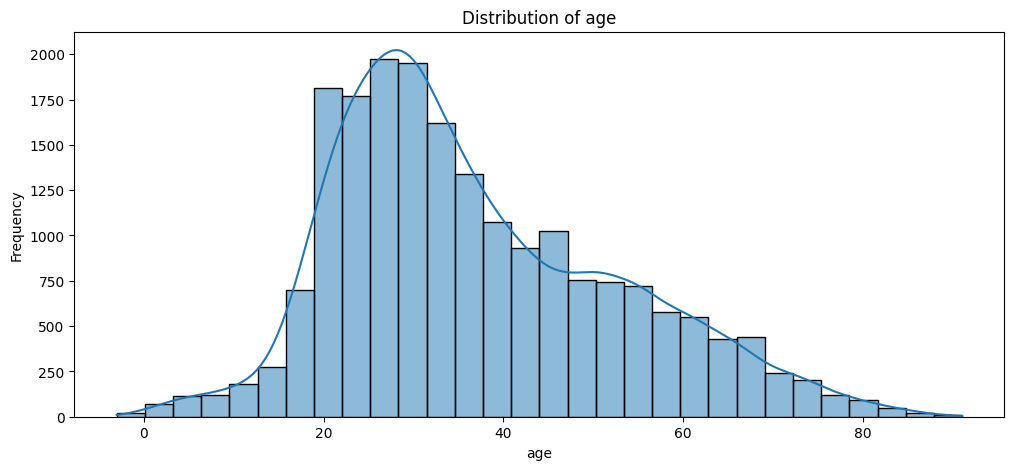

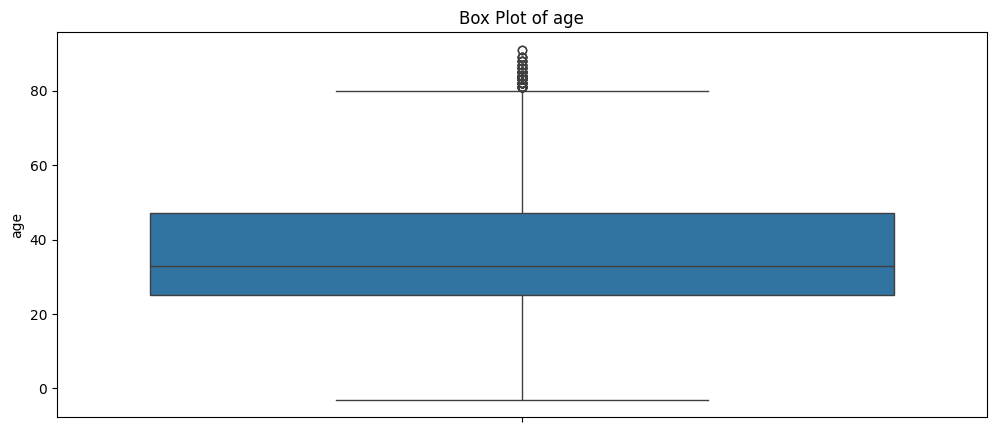

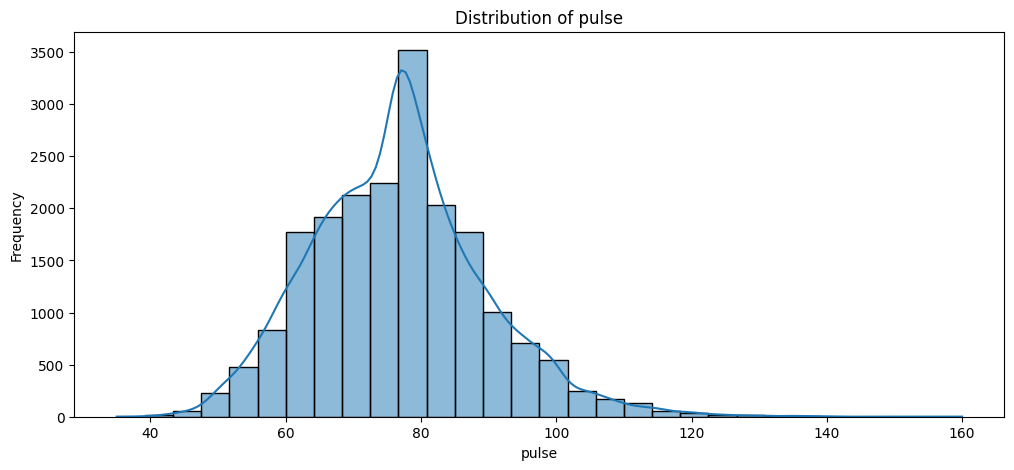

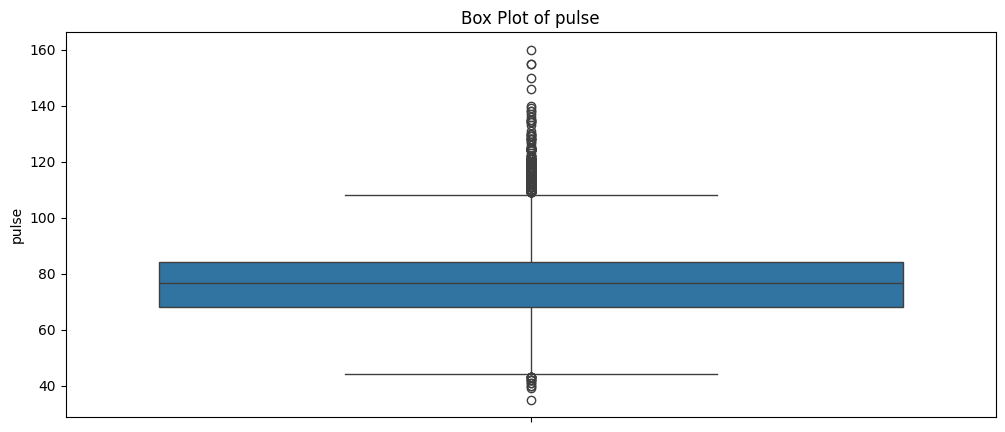

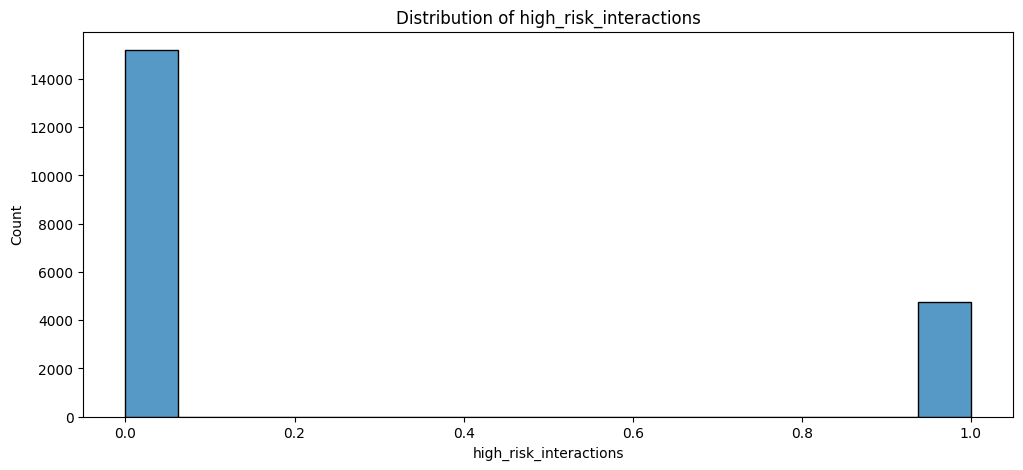

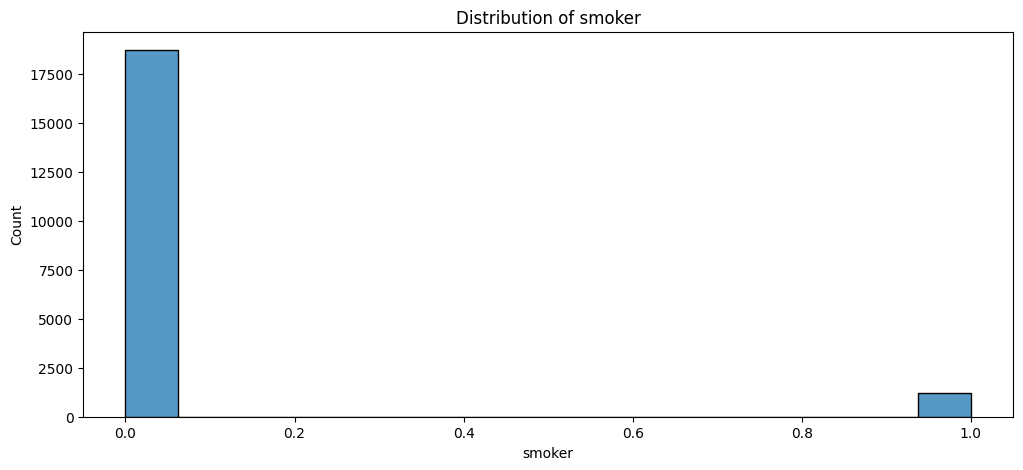

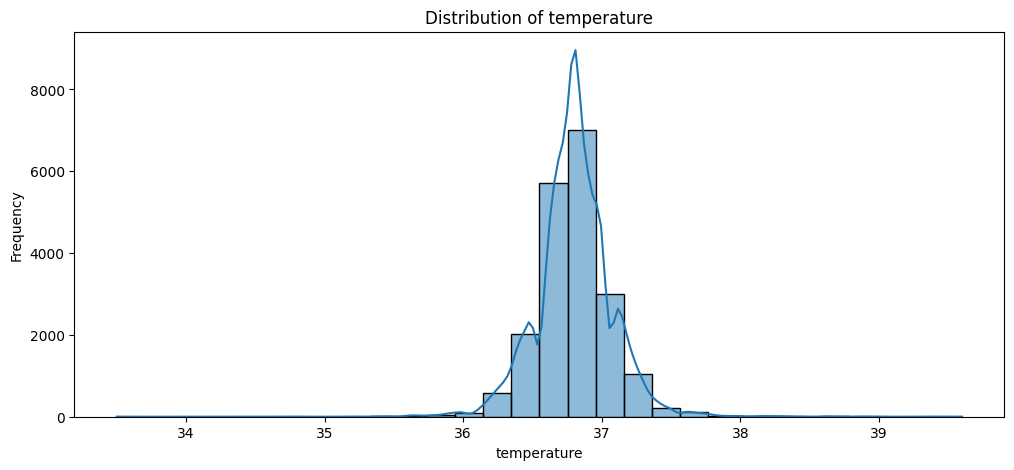

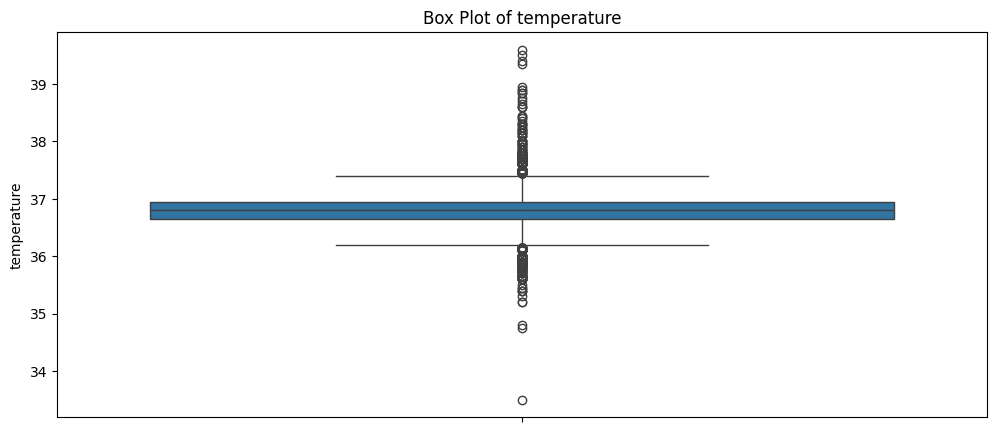

In [ ]:
#Visualizing the distribution of features using histogram and box plot
features_to_plot = ['age', 'pulse', 'high_risk_interactions', 'smoker', 'temperature']
numerical_features = df_updated.select_dtypes(include=['number']).columns.tolist()

for feature in features_to_plot:
    plt.figure(figsize=(12, 5))

    # Histogram with density plot (for numerical features)
    if feature in numerical_features:
        sns.histplot(df_updated[feature], kde=True, bins=30)
        plt.ylabel("Frequency")

    # Histogram only (for categorical features)
    else:
        sns.histplot(df_updated[feature], bins='auto')  # Adjust bins as needed
        plt.ylabel("Count")

    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

    # Box plot (for numerical features only)
    if feature in numerical_features:
        plt.figure(figsize=(12, 5))
        sns.boxplot(y=df_updated[feature])
        plt.title(f"Box Plot of {feature}")
        plt.show()